In [2]:
!pip install somoclu mplot3d-dragger

  Using cached https://files.pythonhosted.org/packages/bf/1d/8f2a89cd9a0f37fe3a8ba114f43e310a832f5f30f7f3d886e6379ab2e722/somoclu-1.7.5.1.tar.gz
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=463673 sha256=caa424467b070ca9177e8648dd79d65b1967d704425d1b44794ca5117143f8f8
  Stored in directory: /root/.cache/pip/wheels/a6/e2/a0/4a61002b47e4965d7f59fd4c7ccf2e86a03ccad366f978d2a7
Successfully built somoclu


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


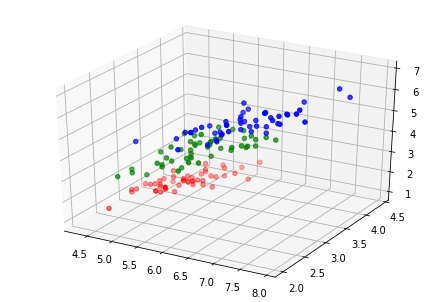

In [6]:
#c1 = np.random.rand(50, 3)/5
c1 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows = 50) 
#c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c2 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
#c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
c3 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 50)
#c4 = np.genfromtxt('submission/kohonen-maps/iris.csv', delimiter=',', usecols=(3))
data = np.float32(np.concatenate((c1, c2, c3)))
 
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
#colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(150)

In [7]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

CPU times: user 12.6 s, sys: 19.9 ms, total: 12.7 s
Wall time: 6.42 s


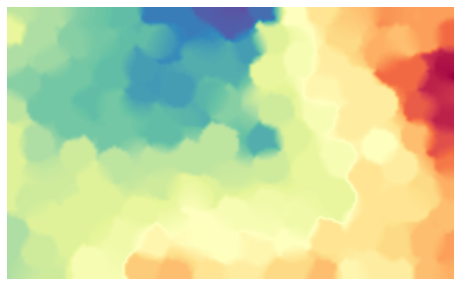

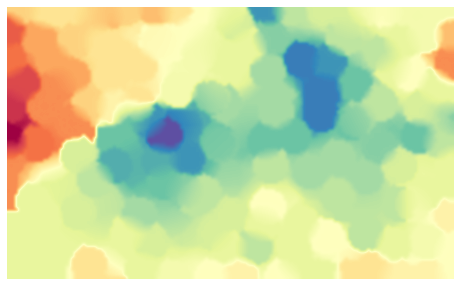

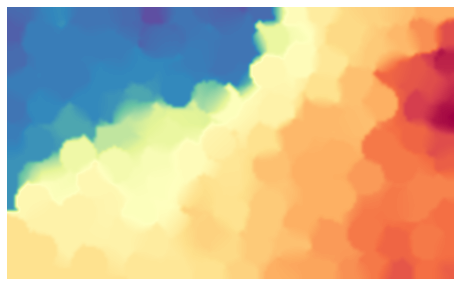

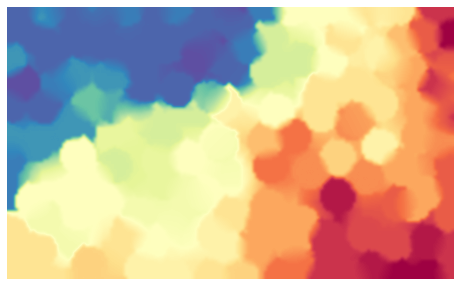

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [8]:
som.view_component_planes()

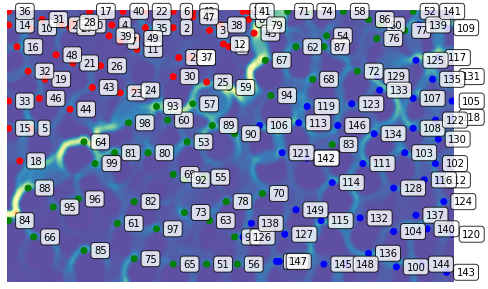

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [9]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

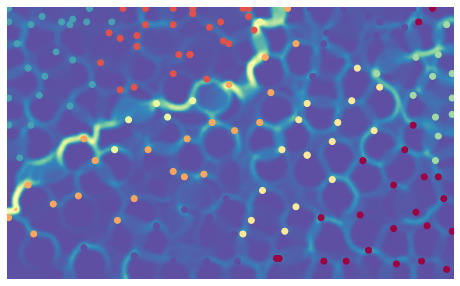

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [10]:
som.cluster()
som.view_umatrix(bestmatches=True)

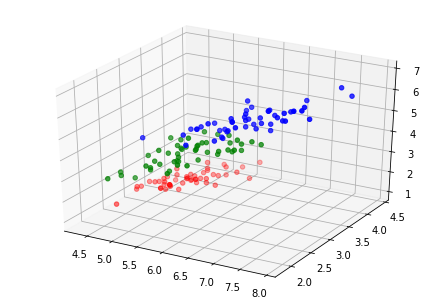

In [11]:
c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c=colors)

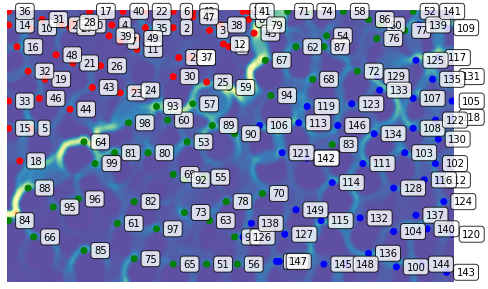

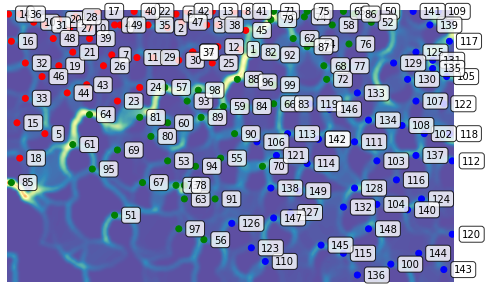

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [12]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=5, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)